# Applications of Machine Learning for Prediction of Petrophysical Well Log Data

Peter Flaming

In [1]:
# Import toolboxes needed for workflow
import pandas as pd

from pandas import set_option
set_option('display.max_columns',400)

import numpy as np

import operator

import os
import re

import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource, ColorBar
from bokeh.palettes import Spectral6
from bokeh.transform import linear_cmap
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [2]:
# Import vertical wells that will be used for model.

VertA = pd.read_excel('VertA_merge.xlsx')
VertB = pd.read_excel('VertB_merge.xlsx')
VertC = pd.read_excel('VertC_merge.xlsx')
VertD = pd.read_excel('VertD_merge.xlsx')
VertE = pd.read_excel('VertE_merge.xlsx')

In [3]:
VertA.head(10)

,Unnamed: 0,DEPT,DT35,GMSG,NPOR:1,DEN,PDPE,NOMD,ROP_-_FAST:1,BIT_WEIGHT,ROTARY_RPM,ROTARY_TORQUE,ANNULAR_VELOCITY,FLOW_DEVIATION,FLOW_IN_RATE,FLOW_OUT_PERCENT,STRKS_-_PUMP_1,STRKS_-_PUMP_2,TOP_DRIVE_RPM,TOP_DRIVE_TORQUE,TORQUE_DIFF,WC_BIT_BOUNCE_,WC_BIT_WEIGHT,WC_DRILL_STOP_POINT,WC_DRUM_ENGAGED,WC_FEED_FORWARD,WC_FREQ_CMD,WC_LOOP_IN_CONTROL_,WC_MOTOR_ENABLE,WC_ROP,WC_REAM_SPEED,WC_SENSITIVITY,WC_STATUS,WC_TARGET_BIT_WEIGHT,WC_TARGET_DIFF_PRESS,WC_TARGET_ROP,WC_TORQUE,WASHOUT_FACTOR
0,1456,4251,73.592187,58.612185,31.864513,2.170399,12.646755,4251,41,29.8,0,0,189.5,14,742,14,222858,137641,60.0,8989,293.0,0.65,29.6,3.25,1.0,60,13.58,1.99,98.90,38.1,40.0,10.0,0,30.0,50,45,8989,4.43124
1,1457,4252,75.015551,58.635367,29.494671,2.228238,12.374189,4252,45,29.5,0,0,162.2,14,632,14,223015,137697,59.9,9004,261.2,0.65,29.2,3.25,1.0,60,14.35,1.94,98.84,40.1,40.0,10.0,0,30.0,50,45,9004,3.29313
2,1458,4253,68.373531,53.440719,28.756012,2.270799,12.052490,4253,47,29.7,0,0,133.7,14,524,14,223165,137704,59.8,8918,526.4,0.65,29.3,3.25,1.0,60,14.98,1.94,100.00,41.6,40.0,10.0,0,30.0,50,45,8918,2.20770
3,1459,4254,72.225699,56.699988,28.934147,2.297231,12.007567,4254,37,29.8,0,0,133.5,14,523,14,223324,137704,59.4,8884,331.4,0.65,29.6,3.25,1.0,60,12.59,1.99,98.96,36.3,40.0,10.0,0,30.0,50,45,8884,2.19770
4,1460,4255,82.482487,72.562314,29.055424,2.317372,12.049351,4255,39,29.9,0,0,133.6,14,524,14,223501,137704,59.2,8877,492.2,0.65,29.6,3.25,1.0,60,12.25,1.99,97.09,34.6,40.0,10.0,0,30.0,50,45,8877,2.19290
5,1461,4256,89.510439,78.234291,30.382938,2.318393,9.997496,4256,41,29.9,0,0,133.6,14,524,14,223682,137704,59.3,8947,508.0,0.65,29.5,3.25,1.0,60,12.93,1.98,97.03,33.8,40.0,10.0,0,30.0,50,45,8947,2.17211
6,1462,4257,87.586623,75.900640,28.861182,2.422779,4.392473,4257,34,29.9,0,0,133.3,14,522,14,223884,137704,59.1,8679,268.1,0.65,29.7,3.25,1.0,60,9.50,2.00,96.85,26.8,40.0,10.0,0,30.0,50,45,8679,2.14916
7,1463,4258,80.819014,74.188538,26.715056,2.392415,2.520431,4258,31,29.9,0,0,133.2,14,522,14,224108,137704,59.1,8662,344.7,0.65,29.6,3.25,1.0,60,9.38,1.98,96.80,27.2,40.0,10.0,0,30.0,50,45,8662,2.14421
8,1464,4259,78.646911,74.902037,26.038144,2.317633,2.451755,4259,29,29.8,0,0,133.4,14,523,14,224332,137704,59.5,8511,307.7,0.65,29.6,3.25,1.0,60,9.46,2.00,97.66,27.2,40.0,10.0,0,30.0,50,45,8511,2.14736
9,1465,4260,77.743018,72.015829,25.590393,2.307339,2.477218,4260,32,29.9,0,0,133.4,14,523,14,224542,137704,59.0,8717,400.1,0.65,29.6,3.25,1.0,60,11.62,1.99,99.07,31.9,40.0,10.0,0,30.0,50,45,8717,2.13521


In [4]:
VertB.head(10)

,Unnamed: 0,DEPT,DT35,GMGC,NPRL:1,DEN,PDPE,NOMD,ROP_-_FAST:1,BIT_WEIGHT,ROTARY_RPM,ROTARY_TORQUE,ANNULAR_VELOCITY,FLOW_DEVIATION,FLOW_IN_RATE,FLOW_OUT_PERCENT,STRKS_-_PUMP_1,STRKS_-_PUMP_2,TOP_DRIVE_RPM,TOP_DRIVE_TORQUE,TORQUE_DIFF,WC_BIT_BOUNCE_,WC_BIT_WEIGHT,WC_DRILL_STOP_POINT,WC_DRUM_ENGAGED,WC_FEED_FORWARD,WC_FREQ_CMD,WC_LOOP_IN_CONTROL_,WC_MOTOR_ENABLE,WC_ROP,WC_REAM_SPEED,WC_SENSITIVITY,WC_STATUS,WC_TARGET_BIT_WEIGHT,WC_TARGET_DIFF_PRESS,WC_TARGET_ROP,WC_TORQUE,WASHOUT_FACTOR
0,4300,4400,112.148523,45.020572,29.665855,2.203634,9.979688,4400,113,21.6,56.2,0,97.0,0,398,0,4527734,2826661,0,0,0,0,21.7,0,0,20,0,0,0,0,0,5,0,0,0,0,0,1.08916
1,4301,4401,110.768695,45.125450,29.403253,2.208611,9.613940,4401,109,20.5,56.4,0,97.1,0,399,0,4527734,2826704,0,0,0,0,20.4,0,0,20,0,0,0,0,0,5,0,0,0,0,0,1.10603
2,4302,4402,103.402214,46.412189,28.358012,2.215791,9.868753,4402,115,20.7,56.6,0,97.2,0,399,0,4527734,2826748,0,0,0,0,20.7,0,0,20,0,0,0,0,0,5,0,0,0,0,0,1.11872
3,4303,4403,93.690801,49.343775,29.947214,2.219052,10.072201,4403,113,20.3,56.6,0,97.0,0,400,0,4527734,2826792,0,0,0,0,20.3,0,0,20,0,0,0,0,0,5,0,0,0,0,0,1.09076
4,4304,4404,89.728122,51.150926,28.364305,2.214016,10.024017,4404,110,20.2,56.8,0,97.3,0,400,0,4527734,2826837,0,0,0,0,20.2,0,0,20,0,0,0,0,0,5,0,0,0,0,0,1.11502
5,4305,4405,84.089073,54.118811,27.368814,2.227729,9.809898,4405,114,21.3,56.5,0,97.1,0,398,0,4527734,2826881,0,0,0,0,21.2,0,0,20,0,0,0,0,0,5,0,0,0,0,0,1.11214
6,4306,4406,75.455279,55.620451,27.700018,2.278673,9.991537,4406,113,21.5,56.5,0,97.2,0,399,0,4527734,2826925,0,0,0,0,21.7,0,0,20,0,0,0,0,0,5,0,0,0,0,0,1.10491
7,4307,4407,76.182242,55.641629,28.736149,2.334759,9.748034,4407,110,22.3,56.3,0,97.2,0,399,0,4527734,2826969,0,0,0,0,22.2,0,0,20,0,0,0,0,0,5,0,0,0,0,0,1.09718
8,4308,4408,86.438603,54.210321,28.671637,2.287481,8.864882,4408,108,21.7,56.0,0,97.2,0,400,0,4527734,2827014,0,0,0,0,21.7,0,0,20,0,0,0,0,0,5,0,0,0,0,0,1.09620
9,4309,4409,88.693749,68.183511,24.969272,2.346502,5.345011,4409,112,21.2,56.1,0,97.3,0,400,0,4527734,2827059,0,0,0,0,21.1,0,0,20,0,0,0,0,0,5,0,0,0,0,0,1.10556


In [5]:
VertC.head(10)

,Unnamed: 0,DEPT,DTCO,DTSM,GR,NPOR,RHOB,UCS,NOMD,ROP_-_FAST:1,BIT_WEIGHT,ROTARY_RPM,ANNULAR_VELOCITY,FLOW_IN_RATE,STRKS_-_PUMP_1,STRKS_-_PUMP_2,WASHOUT_FACTOR
0,0,4030,66.63312,113.30606,41.46545,0.14131,2.52278,11758.24316,4030,208,-0.8,48.6,128.8,486,1576067,1363242,46.54495
1,1,4031,67.18145,115.15578,43.64579,0.14858,2.53122,11497.59570,4031,199,0.5,48.7,128.8,486,1576067,1363282,41.76964
2,2,4032,67.25528,117.52040,38.38870,0.15106,2.49946,11384.04199,4032,74,15.5,45.5,128.8,486,1576067,1363361,49.12903
3,3,4033,68.67612,123.90404,35.95678,0.14282,2.51866,10517.33105,4033,32,16.0,42.0,117.1,489,1576254,1363506,20.40783
4,4,4034,68.31563,127.50055,35.66576,0.18847,2.47841,10927.64160,4034,27,16.0,46.9,111.3,494,1576541,1363528,2.66514
5,5,4035,70.64563,128.46281,34.20087,0.20464,2.48632,9538.51367,4035,25,16.1,45.2,110.8,491,1576770,1363528,2.66852
6,6,4036,77.92729,131.22626,36.32046,0.10597,2.56790,6077.13867,4036,28,15.9,45.4,110.6,491,1576997,1363528,2.68375
7,7,4037,76.84130,123.43102,41.60971,0.06671,2.59580,6348.92822,4037,38,15.7,45.0,110.1,488,1577190,1363528,2.67280
8,8,4038,67.37424,109.26652,47.62590,0.06555,2.60323,11465.03223,4038,27,16.0,47.3,110.1,488,1577383,1363528,2.68742
9,9,4039,61.93237,102.93594,60.61147,0.07845,2.56823,17175.41602,4039,32,15.5,47.4,110.1,488,1577588,1363528,2.69248


In [6]:
VertD.head(10)

,Unnamed: 0,DEPT,MCDT,GMGC,NPRL:1,DEN,PDPE,NOMD,ROP_-_FAST:1,BIT_WEIGHT,ROTARY_RPM,ANNULAR_VELOCITY,FLOW_IN_RATE,STRKS_-_PUMP_1,STRKS_-_PUMP_2,WASHOUT_FACTOR
0,4214,4314,61.995113,36.168691,17.990674,2.342963,13.039880,4314,66,22.2,64.9,63.0,736,498193,506616,2.71909
1,4215,4315,63.401667,39.343416,19.042368,2.365112,13.189936,4315,65,22.1,64.8,63.0,736,498278,506693,2.71346
2,4216,4316,63.331446,42.106236,21.152527,2.351528,13.152980,4316,65,22.2,64.9,63.0,736,498362,506770,2.71360
3,4217,4317,56.960778,41.389302,21.245493,2.345520,13.165814,4317,60,22.9,64.8,63.0,736,498451,506851,2.71597
4,4218,4318,56.011225,41.582878,20.999559,2.371039,13.108427,4318,43,24.1,65.0,63.1,736,498563,506952,2.72417
5,4219,4319,63.333446,44.848954,22.439662,2.361003,12.905796,4319,45,23.9,65.0,63.1,736,498691,507069,2.73088
6,4220,4320,65.542217,47.730870,25.309530,2.377305,12.930339,4320,34,24.5,65.0,63.0,736,498841,507206,2.73197
7,4221,4321,64.713445,46.910109,26.297056,2.379019,13.018819,4321,30,24.5,65.2,63.0,736,499017,507367,2.72929
8,4222,4322,68.000778,42.628667,24.185311,2.402715,12.958176,4322,42,24.1,65.3,63.1,736,499185,507519,2.72707
9,4223,4323,68.069112,37.286002,22.612065,2.352253,13.164625,4323,31,24.6,65.3,63.1,737,499357,507676,2.71998


In [7]:
VertE.head(10)

,Unnamed: 0,DEPT,DT,GRTO,NPHI,RHOB,PE,ROP,WOB,RPM
0,3596,3975,55.8844,94.6119,0.1678,2.0727,11.2877,29.34,18.7,55.33
1,3597,3976,55.2304,91.8182,0.1521,2.0349,11.2218,31.71,18.5,55.00
2,3598,3977,53.9178,99.8062,0.1566,2.0809,10.7882,32.88,18.6,55.00
3,3599,3978,72.5952,104.9252,0.1741,2.1045,10.6999,33.67,18.6,54.67
4,3600,3979,75.6410,104.9194,0.1823,2.0755,10.9719,34.45,18.9,55.00
5,3601,3980,77.3888,101.9503,0.1732,2.0582,11.7275,33.49,18.8,54.67
6,3602,3981,76.7868,105.2291,0.1749,2.0817,11.4366,33.55,18.8,54.67
7,3603,3982,75.6067,110.1252,0.1960,2.0927,11.3296,33.26,19.1,54.67
8,3604,3983,75.3689,109.4029,0.1705,2.0436,10.8775,34.25,19.1,55.33
9,3605,3984,75.7912,111.4090,0.1907,2.0267,11.5796,37.20,18.9,54.67


# Quick Petrophysical and Drilling Data Primer

The following tables are displaying petrophysical and drilling data by depth. The first column we see that starts '4300' is the index. We set this index to be whatever we want and can use this value to reference any row. 

The next column with the header 'DEPT' is the depth column. This column lets us know the distance from the surface in feet. 

The column with the header 'DT35' is a petrophysical measurement of the speed of a compressional sound wave through the rock at this depth. The units are microseconds per foot. The column can equivalently be named DTCO, MCDT, DT. 

The column marked GMGC is a petrophysical measurement of the spontaneous gamma ray emissions from the rock. The units are API which are based on a standard. The column can equivalently be named GR, GRTO, GMSG.

The column marked 'NPRL:1' is a petrophysical measurement of rock porosity at that depth. The units are percentage based. The column can equivalently be named NPOR, NPHI.

The column marked 'DEN' is a petrophysical measurement of rock density at that depth. The units are g/cc. The column can equivalently be named RHOB.

The column marked 'PDPE' is a petrophysical index of mineralogy and it is unitless. The column can equivalently be named PE.

The column marked 'NOMD' is the drilling depth that was used to merge the original drilling and petrophysical data. The units are in feet.

The column marked 'ROP_-_FAST:1' is the rate of penetration of the drill bit through through the rock.

The column marked 'BIT_WEIGHT' is the amount of weight pushing down on the drill bit.

The column marked 'ROTARY_RPM' is the measured rotations per minute of the drill string.

In [8]:
# Take a look at VertA

VertA.describe()

,Unnamed: 0,DEPT,DT35,GMSG,NPOR:1,DEN,PDPE,NOMD,ROP_-_FAST:1,BIT_WEIGHT,ROTARY_RPM,ROTARY_TORQUE,ANNULAR_VELOCITY,FLOW_DEVIATION,FLOW_IN_RATE,FLOW_OUT_PERCENT,STRKS_-_PUMP_1,STRKS_-_PUMP_2,TOP_DRIVE_RPM,TOP_DRIVE_TORQUE,TORQUE_DIFF,WC_BIT_BOUNCE_,WC_BIT_WEIGHT,WC_DRILL_STOP_POINT,WC_DRUM_ENGAGED,WC_FEED_FORWARD,WC_FREQ_CMD,WC_LOOP_IN_CONTROL_,WC_MOTOR_ENABLE,WC_ROP,WC_REAM_SPEED,WC_SENSITIVITY,WC_STATUS,WC_TARGET_BIT_WEIGHT,WC_TARGET_DIFF_PRESS,WC_TARGET_ROP,WC_TORQUE,WASHOUT_FACTOR
count,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.0,5649.0,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.0,5649.000000,5649.000000,5649.000000,5649.000000,5649.000000,5649.00000,5649.000000,5649.000000,5649.0,5649.000000,5649.000000,5649.000000
mean,4282.780669,7078.225527,71.866779,89.908437,16.445192,2.525858,3.354579,7078.225527,51.060011,23.792246,0.0,0.0,139.083820,21.923703,544.694282,21.911843,345088.981590,234577.725084,57.490565,10724.530005,625.040025,0.649740,23.487077,3.276337,0.996999,60.0,15.944068,1.932087,97.956789,47.660790,59.471163,9.90216,0.003894,24.484156,50.0,56.374226,10724.532661,1.893566
std,1632.338829,1632.766580,10.991505,37.203267,7.939564,0.084223,0.647353,1632.766580,17.253549,4.288989,0.0,0.0,19.618891,4.912804,76.866997,4.917523,211657.645881,54513.987451,4.120197,1280.502713,705.603376,0.230748,4.321974,0.180323,0.041615,0.0,6.207070,0.145939,5.417568,16.727953,3.206616,11.64066,0.070302,2.916983,0.0,18.926525,1280.512352,0.661455
min,1456.000000,4251.000000,44.731456,8.345039,0.261295,1.768216,2.063820,4251.000000,10.000000,-1.400000,0.0,0.0,49.000000,8.000000,192.000000,8.000000,155.000000,137641.000000,8.900000,2511.000000,0.000000,0.500000,-1.900000,3.000000,0.060000,60.0,2.190000,1.000000,5.300000,-16.900000,40.000000,-20.00000,0.000000,10.000000,50.0,12.000000,2511.000000,0.676830
25%,2868.000000,5663.000000,64.040047,66.718525,10.704965,2.489617,2.909789,5663.000000,40.000000,22.900000,0.0,0.0,129.200000,18.000000,506.000000,18.000000,180632.000000,169584.000000,54.600000,10088.000000,258.100000,0.520000,22.600000,3.200000,1.000000,60.0,11.640000,1.940000,97.530000,36.500000,60.000000,5.00000,0.000000,24.000000,50.0,40.000000,10088.000000,1.573170
50%,4284.000000,7079.000000,71.416223,90.266879,16.330837,2.535355,3.208577,7079.000000,52.000000,24.800000,0.0,0.0,134.200000,22.000000,526.000000,22.000000,295757.000000,250320.000000,56.900000,10916.000000,373.900000,0.580000,24.500000,3.300000,1.000000,60.0,15.900000,2.000000,100.000000,48.200000,60.000000,10.00000,0.000000,25.000000,50.0,55.000000,10916.000000,1.702360
75%,5696.000000,8492.000000,81.412552,112.341225,22.976069,2.574170,3.690514,8492.000000,62.000000,25.600000,0.0,0.0,138.200000,26.000000,541.000000,26.000000,536094.000000,259037.000000,60.300000,11602.000000,605.800000,0.680000,25.300000,3.400000,1.000000,60.0,19.630000,2.000000,100.000000,58.400000,60.000000,15.00000,0.000000,26.000000,50.0,70.000000,11602.000000,1.862700
max,7108.000000,9904.000000,109.634691,555.784152,39.996130,2.811949,12.646755,9904.000000,148.000000,149.800000,0.0,0.0,203.600000,32.000000,799.000000,32.000000,781672.000000,338882.000000,69.500000,13560.000000,5960.600000,1.660000,148.100000,3.500000,1.000000,60.0,51.560000,2.000000,100.000000,152.300000,60.000000,39.20000,2.000000,33.000000,50.0,100.000000,13560.000000,4.662600


In [9]:
# Take a look at VertB

VertB.describe()

,Unnamed: 0,DEPT,DT35,GMGC,NPRL:1,DEN,PDPE,NOMD,ROP_-_FAST:1,BIT_WEIGHT,ROTARY_RPM,ROTARY_TORQUE,ANNULAR_VELOCITY,FLOW_DEVIATION,FLOW_IN_RATE,FLOW_OUT_PERCENT,STRKS_-_PUMP_1,STRKS_-_PUMP_2,TOP_DRIVE_RPM,TOP_DRIVE_TORQUE,TORQUE_DIFF,WC_BIT_BOUNCE_,WC_BIT_WEIGHT,WC_DRILL_STOP_POINT,WC_DRUM_ENGAGED,WC_FEED_FORWARD,WC_FREQ_CMD,WC_LOOP_IN_CONTROL_,WC_MOTOR_ENABLE,WC_ROP,WC_REAM_SPEED,WC_SENSITIVITY,WC_STATUS,WC_TARGET_BIT_WEIGHT,WC_TARGET_DIFF_PRESS,WC_TARGET_ROP,WC_TORQUE,WASHOUT_FACTOR
count,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.000000,4919.0,4919.000000,4919.0,4919.000000,4919.0,4.919000e+03,4.919000e+03,4919.0,4919.0,4919.0,4919.0,4919.000000,4919.0,4919.0,4919.0,4919.0,4919.0,4919.0,4919.0,4919.0,4919.0,4919.000000,4919.0,4919.0,4919.0,4919.0,4919.000000
mean,7007.966863,7107.966863,70.413061,86.222905,14.946949,2.552449,3.775980,7107.966863,89.998374,18.938483,61.505733,0.0,112.714129,0.0,463.122992,0.0,4.546292e+06,3.086484e+06,0.0,0.0,0.0,0.0,18.962025,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,0.009961,0.0,0.0,0.0,0.0,436.113781
std,1657.812838,1657.812838,11.392140,42.526465,8.130921,0.094738,0.678059,1657.812838,240.790338,8.777581,10.706697,0.0,28.113321,0.0,115.476225,0.0,2.332108e+04,1.634509e+05,0.0,0.0,0.0,0.0,8.991615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138627,0.0,0.0,0.0,0.0,17475.370546
min,4300.000000,4400.000000,45.867359,8.484020,0.303198,1.664607,2.199115,4400.000000,0.000000,-36.500000,0.000000,0.0,0.000000,0.0,0.000000,0.0,4.504951e+06,2.811650e+06,0.0,0.0,0.0,0.0,-36.400000,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,5572.500000,5672.500000,62.127906,59.841883,9.046999,2.516786,3.302934,5672.500000,56.000000,16.200000,61.400000,0.0,99.400000,0.0,408.000000,0.0,4.531362e+06,2.948589e+06,0.0,0.0,0.0,0.0,16.200000,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000,0.0,0.0,0.0,0.0,0.957095
50%,6935.000000,7035.000000,69.651073,86.209660,14.537221,2.564923,3.628081,7035.000000,69.000000,21.700000,63.700000,0.0,101.100000,0.0,416.000000,0.0,4.539861e+06,3.081489e+06,0.0,0.0,0.0,0.0,21.600000,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000,0.0,0.0,0.0,0.0,1.079040
75%,8590.500000,8690.500000,80.048984,111.345240,21.804292,2.608634,4.235057,8690.500000,83.000000,23.700000,65.400000,0.0,102.800000,0.0,422.000000,0.0,4.545016e+06,3.240906e+06,0.0,0.0,0.0,0.0,23.700000,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000,0.0,0.0,0.0,0.0,1.209170
max,9923.000000,10023.000000,122.037341,563.306424,50.003808,2.793612,10.072201,10023.000000,3929.000000,190.700000,75.100000,0.0,193.900000,0.0,796.000000,0.0,4.645496e+06,3.430607e+06,0.0,0.0,0.0,0.0,202.400000,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,2.000000,0.0,0.0,0.0,0.0,711424.312500


In [10]:
# Take a look at VertC

VertC.describe()

,Unnamed: 0,DEPT,DTCO,DTSM,GR,NPOR,RHOB,UCS,NOMD,ROP_-_FAST:1,BIT_WEIGHT,ROTARY_RPM,ANNULAR_VELOCITY,FLOW_IN_RATE,STRKS_-_PUMP_1,STRKS_-_PUMP_2,WASHOUT_FACTOR
count,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.00000,6076.000000,6076.000000,6.076000e+03,6.076000e+03,6076.000000
mean,3063.159315,7093.159315,72.911489,128.208028,72.087459,0.152714,2.610384,11978.040926,7093.159315,75.889072,20.270359,50.55316,124.785352,481.736998,1.632717e+06,1.703770e+06,2.490615
std,1775.891416,1775.891416,11.529340,21.675027,35.388080,0.074213,0.073653,8600.884127,1775.891416,41.415528,4.673456,4.08210,25.329035,109.231515,3.768341e+04,2.249491e+05,1.562862
min,0.000000,4030.000000,45.081840,88.564430,8.780970,0.010620,2.243200,1624.181520,4030.000000,6.000000,-3.400000,4.80000,69.400000,263.000000,1.576067e+06,1.363242e+06,0.000000
25%,1518.750000,5548.750000,64.956902,111.532360,50.764785,0.099327,2.570295,5624.528810,5548.750000,45.000000,17.700000,48.30000,109.300000,415.000000,1.591521e+06,1.492792e+06,1.724803
50%,3059.500000,7089.500000,72.281585,123.835755,71.101945,0.154280,2.612285,9504.870115,7089.500000,74.000000,21.200000,50.80000,117.800000,446.000000,1.628704e+06,1.675327e+06,2.017215
75%,4606.250000,8636.250000,82.320828,145.130535,91.119902,0.211533,2.657503,14982.616695,8636.250000,99.000000,23.000000,53.30000,133.800000,510.000000,1.655980e+06,1.881255e+06,2.475502
max,6129.000000,10159.000000,109.663090,203.768110,508.172240,0.759270,2.889130,56756.863280,10159.000000,1029.000000,38.600000,65.50000,200.700000,811.000000,1.707412e+06,2.149326e+06,49.129030


In [11]:
# Take a look at VertD

VertD.describe()

,Unnamed: 0,DEPT,MCDT,GMGC,NPRL:1,DEN,PDPE,NOMD,ROP_-_FAST:1,BIT_WEIGHT,ROTARY_RPM,ANNULAR_VELOCITY,FLOW_IN_RATE,STRKS_-_PUMP_1,STRKS_-_PUMP_2,WASHOUT_FACTOR
count,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5254.000000,5.254000e+03,5254.000000,5254.000000
mean,6840.500000,6940.500000,65.135341,84.521167,16.664357,2.564313,3.438173,6940.500000,44.970308,17.509307,55.936962,41.290464,482.050628,9.135209e+05,711515.367720,1.553589
std,1516.843488,1516.843488,11.705022,31.500046,7.857871,0.087803,0.755141,1516.843488,75.830242,9.853668,5.296970,5.667677,66.186954,2.841152e+05,102039.650175,0.594222
min,4214.000000,4314.000000,45.612445,12.357642,0.409365,1.458790,1.373964,4314.000000,7.000000,-118.900000,9.600000,13.300000,155.000000,4.981930e+05,506616.000000,0.416940
25%,5527.250000,5627.250000,55.949722,61.844674,11.008969,2.531820,2.943581,5627.250000,29.000000,13.600000,53.100000,39.300000,459.000000,6.712172e+05,606654.250000,1.268265
50%,6840.500000,6940.500000,64.223610,85.291335,15.864088,2.573424,3.270634,6940.500000,35.000000,17.300000,56.200000,40.500000,473.000000,8.076820e+05,756014.000000,1.410900
75%,8153.750000,8253.750000,72.991135,108.550484,22.796876,2.613612,3.842844,8253.750000,49.000000,23.300000,60.000000,41.200000,481.000000,1.204567e+06,758157.000000,1.599988
max,9467.000000,9567.000000,170.604786,236.943681,67.538051,2.920184,13.189936,9567.000000,2778.000000,36.000000,68.100000,79.100000,923.000000,1.364687e+06,951955.000000,14.395510


In [12]:
# Take a look at VertE

VertE.describe()

,Unnamed: 0,DEPT,DT,GRTO,NPHI,RHOB,PE,ROP,WOB,RPM
count,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000
mean,6669.990924,7048.990924,70.668104,96.216126,0.138281,2.550181,3.489247,57.413676,25.403546,64.956049
std,1728.800941,1728.800941,11.636320,53.621146,0.079584,0.182814,0.815282,22.371223,3.041101,10.912189
min,3596.000000,3975.000000,46.303300,4.333600,-0.005000,1.120600,0.612400,7.010000,1.000000,0.000000
25%,5180.250000,5559.250000,61.879475,62.529625,0.075925,2.537725,3.014200,43.350000,24.500000,63.000000
50%,6673.500000,7052.500000,69.821250,95.889800,0.131850,2.589050,3.398200,56.470000,26.200000,65.000000
75%,8163.750000,8542.750000,79.905775,123.798625,0.195675,2.637300,3.968200,71.750000,26.900000,69.330000
max,9691.000000,10070.000000,125.620800,843.866000,0.625700,2.845600,11.727500,750.720000,40.800000,366.330000


In [13]:
# Correct porosity units NPRL:1 = NPOR = NPOR:1
# These values need to be made the same.
VertA['NPOR:1'] = VertA['NPOR:1']/100
VertB['NPRL:1'] = VertB['NPRL:1']/100
VertD['NPRL:1'] = VertD['NPRL:1']/100

In [14]:
# Standardize column names.
# RPM column for VertA is all zeros. 
# We might be able to use 'TOP_DRIVE_RPM' as a substitute.

VertA = VertA[['DEPT','DT35','GMSG','ROP_-_FAST:1','BIT_WEIGHT','TOP_DRIVE_RPM','DEN','NPOR:1']]
VertB = VertB[['DEPT','DT35','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertC = VertC[['DEPT','DTCO','GR','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','RHOB','NPOR']]
VertD = VertD[['DEPT','MCDT','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertE = VertE[['DEPT','DT','GRTO','ROP','WOB','RPM','RHOB','NPHI']]


VertA = VertA.rename(index=str,columns={"DT35":"DT","GMSG":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","TOP_DRIVE_RPM":"RPM","DEN":"RHOB","NPOR:1":"NPHI"})
VertB = VertB.rename(index=str,columns={"DT35":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertC = VertC.rename(index=str,columns={"DTCO":"DT","GR":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","RHOB":"RHOB","NPOR":"NPHI"})
VertD = VertD.rename(index=str,columns={"MCDT":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertE = VertE.rename(index=str,columns={"GRTO":"GR"})

In [15]:
# Plot VertB DT35

x = VertB['DEPT']
y = VertB['DT']

p = figure(title='VertB DT', plot_width=900, plot_height=500)
r1 = p.line(x, y, color='green', line_width=0.25,legend='DT35')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

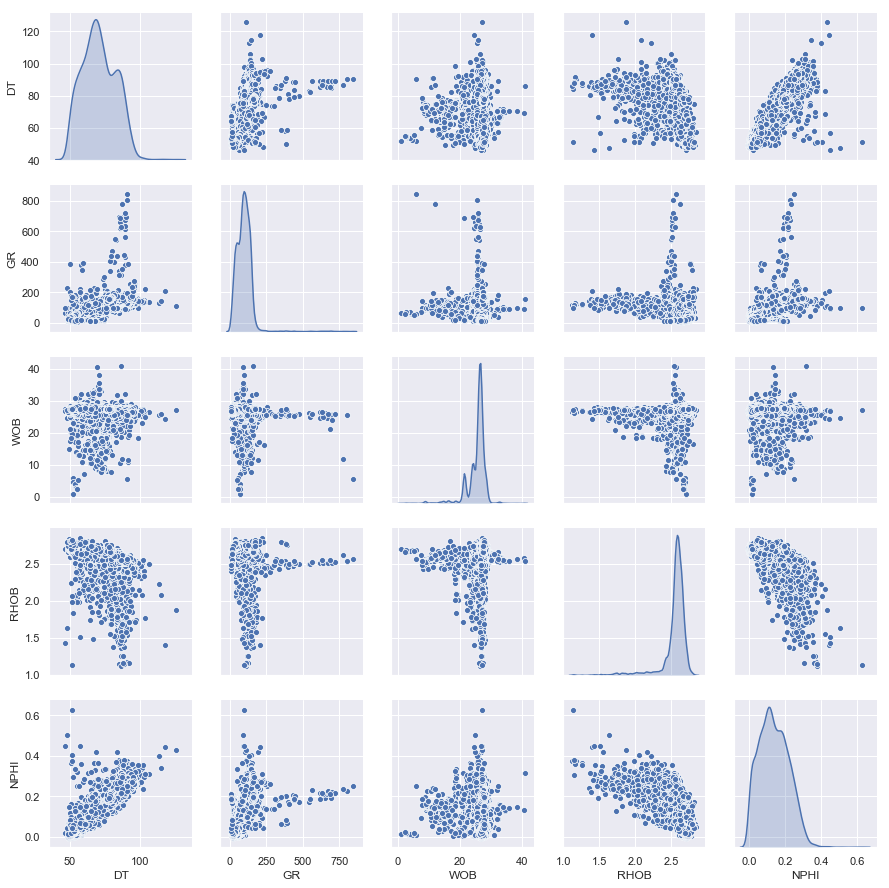

In [16]:
import seaborn as sns
#['DEPT','DT','GR','ROP','WOB','RPM','RHOB','NPHI']
sns.set()
sns.pairplot(VertE[['DT','GR','WOB','RHOB','NPHI']], diag_kind="kde")

<div class="alert alert-success">
    <b>EXERCISE 1</b>:
     <ul>
      <li>Insert 3 new cells and plot gamma ray, porosity, and density for VertB
      <li>For Gamma Ray: GR 
      <li>For Porosity: NPHI
      <li>For Density: RHOB
      </li>
</div>

<div class="alert alert-success">
    <b>EXERCISE 1 SOLUTION START </b>
</div>

In [17]:
# Exercise 1 Solution

x = VertB['DEPT']
y = VertB['GR']

p = figure(title='VertB GR', plot_width=900, plot_height=500)
r1 = p.line(x, y, color='red', line_width=0.25,legend='GR')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'API'
p.legend.location = 'top_left'
show(p)

In [18]:
# Exercise 1 Solution

x = VertB['DEPT']
y = VertB['NPHI']

p = figure(title='VertB Porosity', plot_width=900, plot_height=500)
r1 = p.line(x, y, color='blue', line_width=0.25,legend='NPHI')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Porosity (%)'
p.legend.location = 'top_left'
show(p)

In [19]:
# Exercise 1 Solution

x = VertB['DEPT']
y = VertB['RHOB']

p = figure(title='VertB DENSITY', plot_width=900, plot_height=500)
r1 = p.line(x, y, color='red', line_width=0.25,legend='RHOB')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'g/cc'
p.legend.location = 'bottom_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 1 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 2</b>:
     <ul>
      <li>Train on VertB to Predict VertC for DT
      </li>
</div>

<div class="alert alert-success">
    <b>EXERCISE 2 SOLUTION START </b>
</div>

Training and Testing Data

To evaluate our models we split our dataset into a training set and a test set. If you remember from the supervised learning example for apples and oranges we wanted to test how well our machine had learned to tell the difference by testing the machine with apples and oranges it hadn't previously seen.

For our example we are going to train a machine to predict a compressional wave sonic log using some drilling data and a gamma ray log. We will split VertB into a training and testing set and evaluate the performance of the model within the VertB dataset. We will then use this model to predict the compressional wave sonic log in VertC and evaluate our performance. The goal is a fair evaluation of the system.

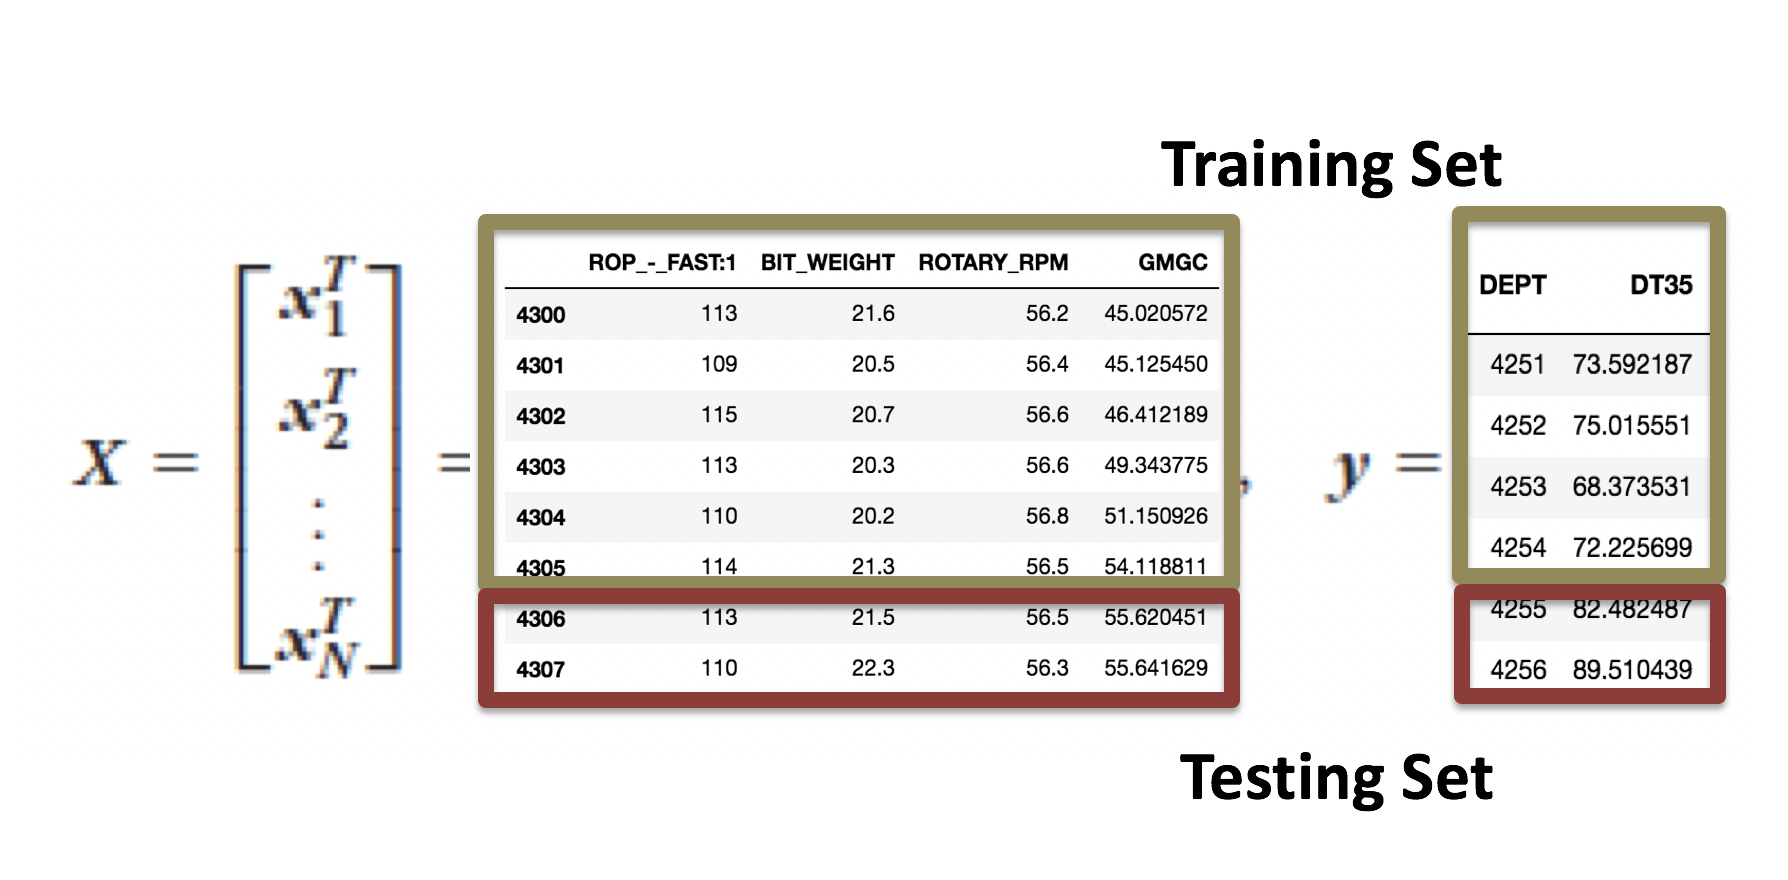

In [20]:
# Let's begin by setting up our VertB and VertC subset datasets.

X_VertB = VertB[['ROP', 'WOB','RPM', 'GR']]
y_VertB = VertB['DT']

X_VertC = VertC[['ROP', 'WOB','RPM', 'GR']]
y_VertC = VertC['DT']

In [21]:
# First we will use VertB to predict VertC and then VertC to predict VertB.
# We will now divide out data into a training and test sets using a rather handy function.
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

train_X_VertB, test_X_VertB, train_y_VertB, test_y_VertB = train_test_split(X_VertB, y_VertB, 
                                                                            train_size=0.9,
                                                                            test_size=0.1,
                                                                            random_state=42)

train_X_VertC, test_X_VertC, train_y_VertC, test_y_VertC = train_test_split(X_VertC, y_VertC, 
                                                                            train_size=0.9,
                                                                            test_size=0.1,
                                                                            random_state=42)

In [22]:
# We will use a neighbour based method for regression.

from sklearn.neighbors import KNeighborsRegressor

kneighbor_regression = KNeighborsRegressor(n_neighbors=10,n_jobs=-1)

kneighbor_regression.fit(train_X_VertB, train_y_VertB)
VertB_test = kneighbor_regression.predict(test_X_VertB)

In [23]:
# Take a look at test results on a crossplot

x = test_y_VertB
y = VertB_test

p = figure(title='VertB DT Crossplot', plot_width=900, plot_height=600)
r1 = p.circle(x, y, color='green', line_width=0.25,legend='DT')
p.xaxis.axis_label = 'VertB Actual'
p.yaxis.axis_label = 'VertB Prediction'
p.legend.location = 'bottom_right'
show(p)

In [24]:
# Now we take the model we just trained and use it to predict DT for VertC
VertC_Pred_DT_KNR = kneighbor_regression.predict(X_VertC)

In [25]:
# Plot results of VertC prediction

x = VertC['DEPT']
y = VertC['DT']
z = VertC_Pred_DT_KNR

p = figure(title='VertC Predicted DTCO using KNR', plot_width=900, plot_height=500)
r = p.line(x, y, color='green', line_width=0.5,legend='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. DT')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [26]:
# Now train on VertC to predict VertB
kneighbor_regression.fit(train_X_VertC, train_y_VertC)

VertC_test = kneighbor_regression.predict(test_X_VertC)

In [27]:
# Take a look at test results on a crossplot

x = test_y_VertC
y = VertC_test

p = figure(title='VertC DT Crossplot', plot_width=900, plot_height=600)
r1 = p.circle(x, y, color='green', line_width=0.25,legend='DT')
p.xaxis.axis_label = 'VertC Actual'
p.yaxis.axis_label = 'VertC Prediction'
p.legend.location = 'bottom_right'
show(p)

In [28]:
VertB_Pred_DT_KNR = kneighbor_regression.predict(X_VertB)

In [29]:
x = VertB['DEPT']
y = VertB['DT']
z = VertB_Pred_DT_KNR

p = figure(title='VertB Predicted DT using KNR', plot_width=900, plot_height=500)
r = p.line(x, y, color='green', line_width=0.25,legend='DT')
r1 = p.line(x, z, color='blue', line_width=0.25,legend='Pred. DT')
p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [30]:
# We will now use mean absolute error to compare performance.
from sklearn.metrics import mean_absolute_error

error_VertB_model = mean_absolute_error(y_VertC, VertC_Pred_DT_KNR)
error_VertC_model = mean_absolute_error(y_VertB, VertB_Pred_DT_KNR)

In [31]:
# Lots of metrics are available.
from sklearn.metrics.scorer import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])


In [32]:
y_VertC.mean()

72.91148947662933

In [33]:
error_VertB_model

7.907993305266623

In [34]:
y_VertB.mean()

70.41306066111

In [35]:
error_VertC_model

6.9911334383004675

In [36]:
# Can we make this prediction better? Let's try a different regression method in sklearn.
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

from sklearn.svm import SVR
svr = SVR(kernel='linear',C=1232, gamma=10)

In [37]:
# SVR works much faster when data is normalized.

from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(VertB[['ROP','WOB','RPM','GR']])
normalized_VertB = scaler.transform(VertB[['ROP','WOB','RPM','GR']])

scaler = Normalizer().fit(VertC[['ROP','WOB','RPM','GR']])
normalized_VertC = scaler.transform(VertC[['ROP','WOB','RPM','GR']])

# Convert back to pandas dataframes
normalized_VertB = pd.DataFrame(normalized_VertB,columns=[['ROP','WOB','RPM','GR']])
normalized_VertC = pd.DataFrame(normalized_VertC,columns=[['ROP','WOB','RPM','GR']])

In [38]:
# Split the normalized data into training and test sets

train_X_VertB, test_X_VertB, train_y_VertB, test_y_VertB = train_test_split(normalized_VertB, y_VertB, 
                                                                            train_size=0.9,
                                                                            test_size=0.1,
                                                                            random_state=42)

train_X_VertC, test_X_VertC, train_y_VertC, test_y_VertC = train_test_split(normalized_VertC, y_VertC, 
                                                                            train_size=0.9,
                                                                            test_size=0.1,
                                                                            random_state=42)

In [39]:
# Fit VertB and predict VertC
VertBtoVertC_DT = svr.fit(train_X_VertB, train_y_VertB)
VertC_Pred_DT = VertBtoVertC_DT.predict(normalized_VertC)

In [40]:
x = VertC['DEPT']
y = VertC['DT']
z = VertC_Pred_DT
z1 = VertC_Pred_DT_KNR

p = figure(title='VertC Predicted DT using SVR', plot_width=900, plot_height=500)
r = p.line(x, y, color='green', line_width=0.5,legend='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. DT SVR')
r2 = p.line(x, z1, color='red', line_width=0.5,legend='Pred. DT KNR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [41]:
# Point of interest. You can view how important each variable is to the prediction with a linear kernel in SVR.
importances = svr.coef_.flatten()
importances

array([ -8.60057201, -37.96867267, -30.3442011 ,  29.01780856])

In [42]:
error_Vert_BtoC_model = mean_absolute_error(y_VertC, VertC_Pred_DT)
error_Vert_BtoC_model

7.585577074400368

In [43]:
# Fit VertC and predict VertB
VertCtoVertB_DT = svr.fit(train_X_VertC, train_y_VertC)
VertB_Pred_DT = VertCtoVertB_DT.predict(normalized_VertB)

In [44]:
x = VertB['DEPT']
y = VertB['DT']
z = VertB_Pred_DT
z1 = VertB_Pred_DT_KNR

p = figure(title='VertB Predicted DT using SVR', plot_width=900, plot_height=500)
r = p.line(x, y, color='green', line_width=0.5,legend='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. DT SVR')
r2 = p.line(x, z1, color='red', line_width=0.5,legend='Pred. DT KNR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [45]:
error_VertC_model = mean_absolute_error(y_VertB, VertB_Pred_DT)
error_VertC_model

6.021257185253799

<div class="alert alert-success">
    <b>EXERCISE 2 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 3</b>:
     <ul>
      <li>See if you can predict the density logs in a similar manner.   
      <li>Prepare your data.
      <li>Create your model using SVR or KNR.
      <li>Fit the model on 1st well.
      <li>Predict the model on 2nd well.
      <li>Plot the predicted vs. actual results.
      </li>
    <ul>
   

<div class="alert alert-success">
    <b>EXERCISE 3 SOLUTION START </b>
</div>

In [46]:
# Prepare your data
# Let's begin by setting up our VertB and VertC subset datasets.

X_VertB = VertB[['ROP','WOB','RPM','GR']]
y_VertB = VertB['RHOB']

X_VertC = VertC[['ROP','WOB','RPM','GR']]
y_VertC = VertC['RHOB']

In [47]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(VertB[['ROP','WOB','RPM','GR']])
normalized_VertB = scaler.transform(VertB[['ROP','WOB','RPM','GR']])

scaler = Normalizer().fit(VertC[['ROP','WOB','RPM','GR']])
normalized_VertC = scaler.transform(VertC[['ROP','WOB','RPM','GR']])

# Convert back to pandas dataframes
normalized_VertB = pd.DataFrame(normalized_VertB,columns=[['ROP','WOB','RPM','GR']])
normalized_VertC = pd.DataFrame(normalized_VertC,columns=[['ROP','WOB','RPM','GR']])

In [48]:
# Split the normalized data into training and test sets

train_X_VertB, test_X_VertB, train_y_VertB, test_y_VertB = train_test_split(normalized_VertB, y_VertB, 
                                                                            train_size=0.9,
                                                                            test_size=0.1,
                                                                            random_state=42)

train_X_VertC, test_X_VertC, train_y_VertC, test_y_VertC = train_test_split(normalized_VertC, y_VertC, 
                                                                            train_size=0.9,
                                                                            test_size=0.1,
                                                                            random_state=42)

In [49]:
# Fit VertB and predict VertC
VertBtoVertC_RHOB = svr.fit(train_X_VertB, train_y_VertB)
VertC_Pred_RHOB = VertBtoVertC_RHOB.predict(normalized_VertB)

In [50]:
x = VertC['DEPT']
y = VertC['RHOB']
z = VertC_Pred_RHOB


p = figure(title='VertC Predicted RHOB using SVR', plot_width=900, plot_height=500)
r = p.line(x, y, color='green', line_width=0.5,legend='RHOB')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. RHOB SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Density (g/cc)'
p.legend.location = 'bottom_right'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 3 SOLUTION END </b>
</div>

We are now going to start to tune our model. There isn't really a general rule for finding the sweet spot. We will start by ranking our features based on what the model determines is important. We will then perform a grid step search looking for the right settings to get the 'best' model performance. 

For recursive feature elimination we need to add back all the overlapping data between VertB and VertC.

In [51]:
print(VertB.columns.tolist())

['DEPT', 'DT', 'GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']


In [52]:
print(VertC.columns.tolist())

['DEPT', 'DT', 'GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']


In [53]:
X_VertB = VertB[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']]
y_VertB = VertB['DT']

X_VertC = VertC[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']]
y_VertC = VertC['DT']

In [54]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(VertB[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])
normalized_VertB = scaler.transform(VertB[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])

scaler = Normalizer().fit(VertC[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])
normalized_VertC = scaler.transform(VertC[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])

# Convert back to pandas dataframes
normalized_VertB = pd.DataFrame(normalized_VertB,columns=[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])
normalized_VertC = pd.DataFrame(normalized_VertC,columns=[['GR', 'ROP', 'WOB', 'RPM', 'RHOB', 'NPHI']])

The recursive feature elimination (RFE) module selects subsets of features. The estimator is trained on all the features in question and an importance ranking is obtained. The least important feature is dropped recursively until the specified number of features is obtained.

In [55]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# We are arbtrarily asking the machine to select the four best features for this model.

from sklearn.feature_selection import RFE

select = RFE(svr,n_features_to_select=4)

In [56]:
select.fit(normalized_VertB, y_VertB)
normalized_VertB_FS = select.transform(normalized_VertB)
print(normalized_VertB.shape)
print(normalized_VertB_FS.shape)

(4919, 6)
(4919, 4)


In [57]:
#RFE.get_support?

In [58]:
mask = select.get_support()
mask

array([False,  True, False,  True,  True,  True])

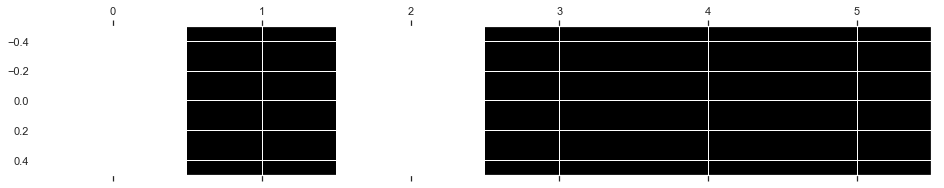

In [59]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [60]:
normalized_VertB.columns.tolist()

[('GR',), ('ROP',), ('WOB',), ('RPM',), ('RHOB',), ('NPHI',)]

In [61]:
normalized_VertB_FS = pd.DataFrame(normalized_VertB_FS,columns=[['ROP', 'RPM', 'RHOB', 'NPHI']])

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

In [63]:
#GridSearchCV?

In [64]:
grid.fit(normalized_VertB_FS, y_VertB)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.7min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [65]:
# We can view more detailed results using the cv_results_ variable
cv_results = pd.DataFrame(grid.cv_results_)
cv_results.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,1.086405,0.044307,0.057560,0.003429,0.333166,0.344722,0.339552,0.310716,0.303010,0.321837,0.341449,0.315608,0.315834,0.361333,0.328716,0.024860,24.50,0.332012,0.330166,0.330812,0.333988,0.333288,0.331866,0.329682,0.333275,0.334201,0.328530,0.331782,0.002698
std,0.574144,0.114339,0.004819,0.003890,0.304980,0.315853,0.317591,0.300736,0.299481,0.304152,0.317053,0.296680,0.296312,0.323179,0.306122,0.025841,14.00,0.307279,0.304800,0.306058,0.306549,0.307730,0.306047,0.306507,0.307731,0.306622,0.305387,0.306456,0.002472
min,0.854008,0.005009,0.052943,0.000801,-0.010046,-0.001101,-0.014486,-0.000416,-0.009128,-0.000045,-0.019174,-0.012642,-0.001020,-0.003529,-0.007159,0.006501,1.00,-0.004136,-0.003985,-0.004446,-0.004671,-0.005500,-0.004238,-0.004311,-0.004245,-0.003706,-0.004894,-0.004413,0.000470
25%,0.887458,0.008701,0.054434,0.001260,0.000137,0.009260,-0.004492,0.009148,0.000682,0.010473,-0.009041,-0.002884,0.008116,0.006852,0.002825,0.006518,12.75,0.005793,0.005887,0.005568,0.005429,0.004537,0.005752,0.005550,0.005749,0.006464,0.005054,0.005579,0.000486
50%,0.920363,0.016038,0.056109,0.001916,0.414596,0.384631,0.398117,0.293285,0.286334,0.303390,0.426471,0.380963,0.347225,0.435495,0.380959,0.016862,24.50,0.379886,0.382254,0.379814,0.398015,0.395359,0.391974,0.369622,0.384273,0.389828,0.372592,0.384474,0.001957
75%,0.986870,0.036305,0.058430,0.004149,0.616990,0.645738,0.649769,0.560645,0.572999,0.612768,0.657716,0.594887,0.572631,0.676701,0.616098,0.029747,36.25,0.620436,0.615017,0.617008,0.623655,0.622854,0.614200,0.614946,0.621620,0.625887,0.615201,0.619082,0.004194
max,4.022117,0.786586,0.071284,0.021746,0.872330,0.895868,0.891558,0.893710,0.862711,0.881233,0.874423,0.855931,0.883519,0.895030,0.880628,0.094540,48.00,0.886049,0.884234,0.884161,0.882563,0.887112,0.885695,0.884907,0.887920,0.884638,0.883253,0.885053,0.009262


In [66]:
print(grid.best_score_)

0.8806284036227409


In [67]:
print(grid.best_params_)

{'C': 1232, 'gamma': 10}


In [68]:
# Take the hyperparameter tuned model with RFE to predict DT for VertC.
hypertune_SVR = grid.predict(normalized_VertC[['ROP', 'RPM', 'RHOB', 'NPHI']])

In [69]:
x = VertC['DEPT']
y = VertC['DT']
z = VertC_Pred_DT
z1 = VertC_Pred_DT_KNR
z2 = hypertune_SVR

p = figure(title='VertC Predicted DT using SVR', plot_width=900, plot_height=500)
r = p.line(x, y, color='green', line_width=0.5,legend='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. DT SVR')
r2 = p.line(x, z1, color='red', line_width=0.5,legend='Pred. DT KNR')
r3 = p.line(x, z2, color='orange', line_width=0.5,legend='hypertune_SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'Delta Time (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [70]:
# Calculate MAE so we can compare model performance before and after tuning.
error_VertB_hypertune_model = mean_absolute_error(y_VertC, hypertune_SVR)
print(error_VertB_hypertune_model)
print(error_VertB_model)

5.680406251279293
7.907993305266623


<div class="alert alert-success">
    <b>EXERCISE 4</b>:
     <ul>
      <li>See how the model predicts with more data. 
      <li>Let's concatenate A,B,C,D and predict E for DT  
      </li>
    </ul>
</div>

<div class="alert alert-success">
    <b>EXERCISE 4 SOLUTION START </b>
</div>

In [71]:
# How does more data affect the result?
# Let's concatenate A,B,C,D and predict E for DT 

In [72]:
VertA = pd.read_excel('VertA_merge.xlsx')
VertB = pd.read_excel('VertB_merge.xlsx')
VertC = pd.read_excel('VertC_merge.xlsx')
VertD = pd.read_excel('VertD_merge.xlsx')
VertE = pd.read_excel('VertE_merge.xlsx')

In [73]:
# Correct porosity units NPRL:1 = NPOR = NPOR:1
# These values need to be made the same.
VertA['NPOR:1'] = VertA['NPOR:1']/100
VertB['NPRL:1'] = VertB['NPRL:1']/100
VertD['NPRL:1'] = VertD['NPRL:1']/100

In [74]:
# Merge A, B, C, D, and predict DT for E.
# And standardize column names.
# My RPM column for VertA is all zeros. 
# We might be able to use 'TOP_DRIVE_RPM' as a substitute.

VertA_subset = VertA[['DEPT','DT35','GMSG','ROP_-_FAST:1','BIT_WEIGHT','TOP_DRIVE_RPM','DEN','NPOR:1']]
VertB_subset = VertB[['DEPT','DT35','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertC_subset = VertC[['DEPT','DTCO','GR','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','RHOB','NPOR']]
VertD_subset = VertD[['DEPT','MCDT','GMGC','ROP_-_FAST:1','BIT_WEIGHT','ROTARY_RPM','DEN','NPRL:1']]
VertE_subset = VertE[['DEPT','DT','GRTO','ROP','WOB','RPM','RHOB','NPHI']]


VertA_subset = VertA_subset.rename(index=str,columns={"DT35":"DT","GMSG":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","TOP_DRIVE_RPM":"RPM","DEN":"RHOB","NPOR:1":"NPHI"})
VertB_subset = VertB_subset.rename(index=str,columns={"DT35":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertC_subset = VertC_subset.rename(index=str,columns={"DTCO":"DT","GR":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","RHOB":"RHOB","NPOR":"NPHI"})
VertD_subset = VertD_subset.rename(index=str,columns={"MCDT":"DT","GMGC":"GR","ROP_-_FAST:1":"ROP","BIT_WEIGHT":"WOB","ROTARY_RPM":"RPM","DEN":"RHOB","NPRL:1":"NPHI"})
VertE_subset = VertE_subset.rename(index=str,columns={"GRTO":"GR"})


frames = [VertA_subset,VertB_subset,VertC_subset,VertD_subset]
mergeABCD = pd.concat(frames,ignore_index=True)

In [75]:
# Setup our X and y matrices
X_VertABCD = mergeABCD[['ROP','WOB','RPM','GR','RHOB','NPHI']]
y_VertABCD = mergeABCD['DT']

X_VertE = VertE_subset[['ROP','WOB','RPM','GR','RHOB','NPHI']]
y_VertE = VertE_subset['DT']

In [76]:
# SVR works much faster when data is normalized.

scaler = Normalizer().fit(X_VertABCD[['ROP','WOB','RPM','GR','RHOB','NPHI']])
normalized_mergeABCD_X = scaler.transform(X_VertABCD[['ROP','WOB','RPM','GR','RHOB','NPHI']])

scaler = Normalizer().fit(VertE_subset[['ROP','WOB','RPM','GR','RHOB','NPHI']])
normalized_VertE_subset_X = scaler.transform(VertE_subset[['ROP','WOB','RPM','GR','RHOB','NPHI']])

# Convert back to pandas dataframes
normalized_mergeABCD_X = pd.DataFrame(normalized_mergeABCD_X,columns=[['ROP','WOB','RPM','GR','RHOB','NPHI']])
normalized_VertE_subset_X = pd.DataFrame(normalized_VertE_subset_X,columns=[['ROP','WOB','RPM','GR','RHOB','NPHI']])

In [77]:
select = RFE(svr,n_features_to_select=4)

In [78]:
select.fit(normalized_mergeABCD_X, y_VertABCD)
normalized_mergeABCD_X_FS = select.transform(normalized_mergeABCD_X)
print(normalized_mergeABCD_X.shape)
print(normalized_mergeABCD_X_FS.shape)

(21898, 6)
(21898, 4)


In [79]:
mask = select.get_support()
mask

array([False, False,  True,  True,  True,  True])

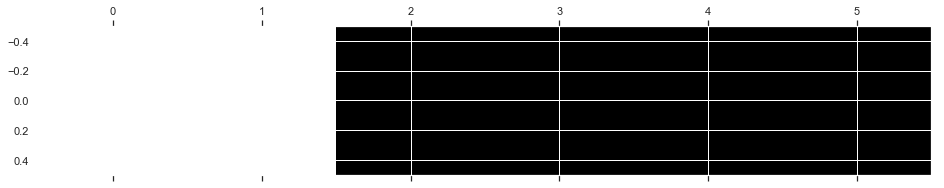

In [80]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [81]:
normalized_mergeABCD_X.columns.tolist()

[('ROP',), ('WOB',), ('RPM',), ('GR',), ('RHOB',), ('NPHI',)]

In [82]:
normalized_mergeABCD_X_FS = pd.DataFrame(normalized_mergeABCD_X_FS,columns=[['RPM','GR','RHOB','NPHI']])

In [83]:
# Perform cross-validation and hyperparameter tune.
cv = KFold(n_splits=10, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

grid.fit(normalized_mergeABCD_X_FS, y_VertABCD)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 39.1min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [84]:
print(grid.best_score_)

0.6811963586922035


In [85]:
print(grid.best_params_)

{'C': 1232, 'gamma': 10}


In [86]:
# Take the hyperparameter tuned model with RFE to predict DT for VertE.
hypertune_SVR = grid.predict(normalized_VertE_subset_X[['RPM','GR','RHOB','NPHI']])

In [87]:
x = VertE['DEPT']
y = VertE['DT']
z = hypertune_SVR

p = figure(title='VertE Predicted DT using SVR', plot_width=900, plot_height=500)
r = p.line(x, y, color='green', line_width=0.5,legend='DT')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. DT SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'DT (ms/ft)'
p.legend.location = 'top_left'
show(p)

In [88]:
# Calculate MAE 
error_VertABCD_hypertune_model = mean_absolute_error(y_VertE, hypertune_SVR)
print(error_VertABCD_hypertune_model)

4.009107742139388


<div class="alert alert-success">
    <b>EXERCISE 4 SOLUTION END </b>
</div>

<div class="alert alert-success">
    <b>EXERCISE 5</b>:
     <ul>
      <li> 
       1. Cut VertC log in roughly half.
       <li>
       2. Setup X and y matrices to predict DTSM.
       <li>
       3. Normalize data and convert back to dataframe.
       <li>
       4. Perform RFE.
       <li>
       5. Perform hyperparameter tuning.
       <li>
       6. Predict remainder of VertC with RFE tuned model.
       <li>
       7. Plot VertC DTSM vs. prediction.    
<div>

<div class="alert alert-success">
    <b>EXERCISE 5 SOLUTION START </b>
</div>

In [89]:
VertC = pd.read_excel('VertC_merge.xlsx')

In [90]:
VertC_upper = VertC.loc[(VertC['DEPT']>=4030)&(VertC['DEPT']<=7095),['DEPT', 'DTCO', 'DTSM', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']]
VertC_lower = VertC.loc[(VertC['DEPT']>=7095)&(VertC['DEPT']<=10159),['DEPT', 'DTCO', 'DTSM', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']]


In [91]:
VertC_upper.head(20)

,DEPT,DTCO,DTSM,GR,NPOR,RHOB,UCS,ROP_-_FAST:1,BIT_WEIGHT,ROTARY_RPM
0,4030,66.63312,113.30606,41.46545,0.14131,2.52278,11758.24316,208,-0.8,48.6
1,4031,67.18145,115.15578,43.64579,0.14858,2.53122,11497.59570,199,0.5,48.7
2,4032,67.25528,117.52040,38.38870,0.15106,2.49946,11384.04199,74,15.5,45.5
3,4033,68.67612,123.90404,35.95678,0.14282,2.51866,10517.33105,32,16.0,42.0
4,4034,68.31563,127.50055,35.66576,0.18847,2.47841,10927.64160,27,16.0,46.9
5,4035,70.64563,128.46281,34.20087,0.20464,2.48632,9538.51367,25,16.1,45.2
6,4036,77.92729,131.22626,36.32046,0.10597,2.56790,6077.13867,28,15.9,45.4
7,4037,76.84130,123.43102,41.60971,0.06671,2.59580,6348.92822,38,15.7,45.0
8,4038,67.37424,109.26652,47.62590,0.06555,2.60323,11465.03223,27,16.0,47.3
9,4039,61.93237,102.93594,60.61147,0.07845,2.56823,17175.41602,32,15.5,47.4


In [92]:
VertC_lower.head(20)

,DEPT,DTCO,DTSM,GR,NPOR,RHOB,UCS,ROP_-_FAST:1,BIT_WEIGHT,ROTARY_RPM
3043,7095,71.96245,117.64670,85.12890,0.15261,2.61392,10014.86523,35,14.4,50.8
3044,7096,71.86623,119.17068,104.03797,0.13992,2.62553,10173.51758,34,14.3,50.8
3045,7097,71.39951,120.06022,105.78664,0.14260,2.62924,10646.56152,36,14.2,50.6
3046,7098,69.74753,117.34303,101.01886,0.13903,2.63077,11610.82812,38,14.2,50.6
3047,7099,68.80775,116.03492,97.95691,0.12837,2.64261,12399.12891,36,14.2,50.6
3048,7100,69.09162,117.21630,92.83092,0.14335,2.66623,12545.94727,24,14.6,51.8
3049,7101,68.90965,117.74143,88.55781,0.14961,2.66008,12672.84277,29,14.5,50.6
3050,7102,65.17434,112.05242,79.96069,0.11392,2.64731,15940.82617,20,15.2,51.3
3051,7103,59.33731,104.30331,44.21117,0.06503,2.67818,21546.37695,38,15.3,50.0
3052,7104,56.92542,103.96387,30.11300,0.05113,2.62794,23940.13281,25,15.2,50.2


In [93]:
# Setup our X and y matrices
X_VertC_upper = VertC_upper[['DEPT', 'DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']]
y_VertC_upper = VertC_upper['DTSM']

X_VertC_lower = VertC_lower[['DEPT', 'DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']]
y_VertC_lower = VertC_lower['DTSM']

In [94]:
scaler = Normalizer().fit(X_VertC_upper[['DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']])
normalized_X_VertC_upper = scaler.transform(X_VertC_upper[['DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']])

scaler = Normalizer().fit(X_VertC_lower[['DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']])
normalized_X_VertC_lower = scaler.transform(X_VertC_lower[['DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']])

# Convert back to pandas dataframes
normalized_X_VertC_upper = pd.DataFrame(normalized_X_VertC_upper,columns=[['DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']])
normalized_X_VertC_lower = pd.DataFrame(normalized_X_VertC_lower,columns=[['DTCO', 'GR', 'NPOR', 'RHOB', 'UCS', 'ROP_-_FAST:1', 'BIT_WEIGHT', 'ROTARY_RPM']])


In [95]:
select = RFE(svr,n_features_to_select=4)

In [96]:
select.fit(normalized_X_VertC_upper, y_VertC_upper)
normalized_X_VertC_upper_FS = select.transform(normalized_X_VertC_upper)
print(normalized_X_VertC_upper.shape)
print(normalized_X_VertC_upper_FS.shape)

(3044, 8)
(3044, 4)


In [97]:
mask = select.get_support()
mask

array([ True,  True, False, False, False, False,  True,  True])

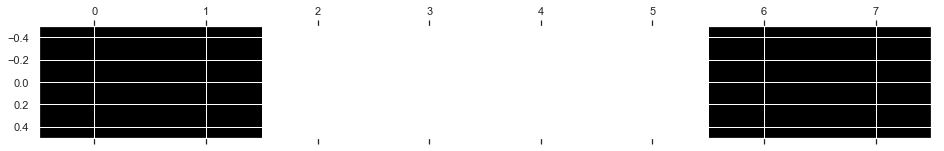

In [98]:
# Plot the mask. Black is True, White is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [99]:
normalized_X_VertC_upper.columns.tolist()

[('DTCO',),
 ('GR',),
 ('NPOR',),
 ('RHOB',),
 ('UCS',),
 ('ROP_-_FAST:1',),
 ('BIT_WEIGHT',),
 ('ROTARY_RPM',)]

In [100]:
normalized_X_VertC_upper_FS = pd.DataFrame(normalized_X_VertC_upper_FS,columns=[['DTCO','GR','BIT_WEIGHT','ROTARY_RPM']])

In [101]:
# Perform cross-validation and hyperparameter tune.
cv = KFold(n_splits=10, random_state=42, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

grid.fit(normalized_X_VertC_upper_FS, y_VertC_upper)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   33.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1232], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [102]:
print(grid.best_params_)

{'C': 1232, 'gamma': 10}


In [103]:
# Take the hyperparameter tuned model with RFE to predict DTSM for VertC_lower.
hypertune_SVR = grid.predict(normalized_X_VertC_lower[['DTCO','GR','BIT_WEIGHT','ROTARY_RPM']])

In [104]:
x = X_VertC_lower['DEPT']
y = y_VertC_lower
z = hypertune_SVR

p = figure(title='VertC_lower Predicted DTSM using SVR', plot_width=900, plot_height=500)
r = p.line(x, y, color='green', line_width=0.5,legend='DTSM')
r1 = p.line(x, z, color='blue', line_width=0.5,legend='Pred. DTSM SVR')

p.xaxis.axis_label = 'Depth (ft)'
p.yaxis.axis_label = 'DTSM (ms/ft)'
p.legend.location = 'top_left'
show(p)

<div class="alert alert-success">
    <b>EXERCISE 5 SOLUTION END </b>
</div>